In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)


1.4.1.post1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving IBM_HR_Final_cleaned_Data.xlsm to IBM_HR_Final_cleaned_Data.xlsm


In [ ]:
df=pd.read_excel('IBM_HR_Final_cleaned_Data.xlsm')

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
1,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,80,1,10,3,3,10,7,1,7,Seek
2,59,Non-Travel,1420,Human Resources,2,4,1,Male,37,2,...,80,1,10,3,3,10,7,1,7,Seek
3,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek
4,49,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Seek


In [ ]:
df.tail()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
19473,47,Travel_Rarely,465,Research & Development,1,3,4,Female,98,2,...,80,0,6,3,3,6,2,4,1,Jora
19474,38,Travel_Rarely,371,Research & Development,2,3,4,Male,45,3,...,80,0,6,3,3,3,2,1,2,Company Website
19475,34,Travel_Rarely,629,Research & Development,27,2,4,Female,95,3,...,80,0,9,3,3,3,2,1,2,Company Website
19476,55,Non-Travel,177,Research & Development,8,1,4,Female,84,3,...,80,0,31,3,3,2,0,2,2,Recruit.net
19477,27,Travel_Rarely,1134,Research & Development,16,4,4,Male,98,3,...,80,1,7,2,3,6,2,1,2,Company Website


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       19478 non-null  int64 
 1   BusinessTravel            19478 non-null  object
 2   DailyRate                 19478 non-null  int64 
 3   Department                19478 non-null  object
 4   DistanceFromHome          19478 non-null  int64 
 5   Education                 19478 non-null  int64 
 6   EnvironmentSatisfaction   19478 non-null  int64 
 7   Gender                    19478 non-null  object
 8   HourlyRate                19478 non-null  int64 
 9   JobInvolvement            19478 non-null  int64 
 10  JobLevel                  19478 non-null  int64 
 11  JobRole                   19478 non-null  object
 12  JobSatisfaction           19478 non-null  int64 
 13  MaritalStatus             19478 non-null  object
 14  MonthlyIncome         

in this dataset we have 19478  rows and 30 columns in which 23 are int datatype and 7 are object with no null values present

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,...,19478.000000,19478.0,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,37.524489,812.367697,8.945836,2.924274,2.743043,65.752028,2.752028,2.104990,2.752849,6665.078961,...,2.716860,80.0,0.829192,11.543639,2.825136,2.769689,7.177123,4.365233,2.207824,4.235445
std,8.860420,402.778087,8.006485,1.026008,1.086988,20.352942,0.701120,1.115506,1.097875,4781.062495,...,1.076417,0.0,0.845111,7.741294,1.291566,0.700480,6.130308,3.656812,3.230470,3.595436
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3038.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,813.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5042.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8620.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Now lets find null values

In [ ]:
df.isnull().sum()/len(df)*100

Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
Employee Source             0.0
dtype: float64

#### There is no null values present in this dataset

In [ ]:
for i in df:
    print(i)
    print(df[i].unique())

Age
[49 59 54 33 30 27 31 58 25 32 44 28 36 41 34 38 39 40 45 47 35 37 29 42
 57 50 20 43 24 22 51 53 21 55 46 26 56 23 52 19 60 48 18]
BusinessTravel
['Travel_Frequently' 'Non-Travel' 'Travel_Rarely']
DailyRate
[ 279 1420  142 1392 1240  591  106  682  622  326 1005  489 1117  566
 1324  427  636  334 1358  314  827  506  254 1105  216  141  444  906
  981  804  167  602  336  192 1225 1299 1041  665  538  849 1467  809
  829 1040  889  525  390  153 1075  555  798 1249  405  670  433 1115
  558 1490 1346  147 1232  959  553  660 1147 1280  185  830 1389  888
  534 1302  782 1220 1246 1456  362 1377  330 1123 1219  552  371  673
 1336  419  391 1213 1282  189  309  691  477  705  924 1459  125 1273
  890  852 1141  464  994  721 1065  408 1211 1229 1488  515 1097  853
 1443  655  653 1142 1435 1195 1339 1328  989  548  132 1223  746  836
  584 1311  111 1400  664  432  288  530 1082  776 1127  193 1031  397
 1189  945  922  394 1214 1312  573  684 1153  541  802 1355 1329  632
  438 1

# Separating cat and num columns

In [ ]:
cat_col=df.select_dtypes(object)
cat_col

,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Employee Source
0,Travel_Frequently,Research & Development,Male,Research Scientist,Married,No,Seek
1,Non-Travel,Human Resources,Male,Research Scientist,Married,No,Seek
2,Non-Travel,Human Resources,Male,Research Scientist,Married,No,Seek
3,Travel_Frequently,Research & Development,Male,Research Scientist,Married,No,Seek
4,Travel_Frequently,Research & Development,Male,Research Scientist,Married,No,Seek
...,...,...,...,...,...,...,...
19473,Travel_Rarely,Research & Development,Female,Laboratory Technician,Single,No,Jora
19474,Travel_Rarely,Research & Development,Male,Research Scientist,Single,Yes,Company Website
19475,Travel_Rarely,Research & Development,Female,Research Scientist,Single,No,Company Website
19476,Non-Travel,Research & Development,Female,Manufacturing Director,Married,Yes,Recruit.net


In [ ]:
num_col=df.select_dtypes([int,float])
num_col

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,279,8,1,3,61,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
1,59,1420,2,4,1,37,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
2,59,1420,2,4,1,37,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
3,49,279,8,1,3,61,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
4,49,279,8,1,3,61,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19473,47,465,1,3,4,98,2,1,2,2837,...,3,80,0,6,3,3,6,2,4,1
19474,38,371,2,3,4,45,3,1,4,3944,...,3,80,0,6,3,3,3,2,1,2
19475,34,629,27,2,4,95,3,1,2,2311,...,4,80,0,9,3,3,3,2,1,2
19476,55,177,8,1,4,84,3,3,1,10008,...,4,80,0,31,3,3,2,0,2,2


In [ ]:
for i in cat_col:
    print(i)
    print(cat_col[i].unique())

BusinessTravel
['Travel_Frequently' 'Non-Travel' 'Travel_Rarely']
Department
['Research & Development' 'Human Resources' 'Sales']
Gender
['Male' 'Female']
JobRole
['Research Scientist' 'Manufacturing Director' 'Laboratory Technician'
 'Sales Representative' 'Sales Executive' 'Manager' 'Human Resources'
 'Healthcare Representative' 'Research Director']
MaritalStatus
['Married' 'Single' 'Divorced']
OverTime
['No' 'Yes']
Employee Source
['Seek' 'Indeed' 'Referral' 'Company Website' 'Adzuna' 'GlassDoor' 'Jora'
 'LinkedIn' 'Recruit.net']


In [ ]:
for i in num_col:
    print(i)
    print(num_col[i].unique())

Age
[49 59 54 33 30 27 31 58 25 32 44 28 36 41 34 38 39 40 45 47 35 37 29 42
 57 50 20 43 24 22 51 53 21 55 46 26 56 23 52 19 60 48 18]
DailyRate
[ 279 1420  142 1392 1240  591  106  682  622  326 1005  489 1117  566
 1324  427  636  334 1358  314  827  506  254 1105  216  141  444  906
  981  804  167  602  336  192 1225 1299 1041  665  538  849 1467  809
  829 1040  889  525  390  153 1075  555  798 1249  405  670  433 1115
  558 1490 1346  147 1232  959  553  660 1147 1280  185  830 1389  888
  534 1302  782 1220 1246 1456  362 1377  330 1123 1219  552  371  673
 1336  419  391 1213 1282  189  309  691  477  705  924 1459  125 1273
  890  852 1141  464  994  721 1065  408 1211 1229 1488  515 1097  853
 1443  655  653 1142 1435 1195 1339 1328  989  548  132 1223  746  836
  584 1311  111 1400  664  432  288  530 1082  776 1127  193 1031  397
 1189  945  922  394 1214 1312  573  684 1153  541  802 1355 1329  632
  438 1334  857  638  933 1093  194 1217 1353 1452  120  465  702 1268
  

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in cat_col:
    cat_col[i]=le.fit_transform(cat_col[i])
    print(cat_col[i].unique())
    print(le.classes_)


[1 0 2]
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[1 0 2]
['Human Resources' 'Research & Development' 'Sales']
[1 0]
['Female' 'Male']
[6 4 2 8 7 3 1 0 5]
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
[1 2 0]
['Divorced' 'Married' 'Single']
[0 1]
['No' 'Yes']
[8 3 7 1 0 2 4 5 6]
['Adzuna' 'Company Website' 'GlassDoor' 'Indeed' 'Jora' 'LinkedIn'
 'Recruit.net' 'Referral' 'Seek']


In [ ]:
cat_col.head()

,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Employee Source
0,1,1,1,6,1,0,8
1,0,0,1,6,1,0,8
2,0,0,1,6,1,0,8
3,1,1,1,6,1,0,8
4,1,1,1,6,1,0,8


In [ ]:
new_df=pd.concat([cat_col,num_col],axis=1)

In [ ]:
new_df

,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Employee Source,Age,DailyRate,DistanceFromHome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,1,6,1,0,8,49,279,8,...,4,80,1,10,3,3,10,7,1,7
1,0,0,1,6,1,0,8,59,1420,2,...,4,80,1,10,3,3,10,7,1,7
2,0,0,1,6,1,0,8,59,1420,2,...,4,80,1,10,3,3,10,7,1,7
3,1,1,1,6,1,0,8,49,279,8,...,4,80,1,10,3,3,10,7,1,7
4,1,1,1,6,1,0,8,49,279,8,...,4,80,1,10,3,3,10,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19473,2,1,0,2,2,0,4,47,465,1,...,3,80,0,6,3,3,6,2,4,1
19474,2,1,1,6,2,1,1,38,371,2,...,3,80,0,6,3,3,3,2,1,2
19475,2,1,0,6,2,0,1,34,629,27,...,4,80,0,9,3,3,3,2,1,2
19476,0,1,0,4,1,1,6,55,177,8,...,4,80,0,31,3,3,2,0,2,2


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   BusinessTravel            19478 non-null  int64
 1   Department                19478 non-null  int64
 2   Gender                    19478 non-null  int64
 3   JobRole                   19478 non-null  int64
 4   MaritalStatus             19478 non-null  int64
 5   OverTime                  19478 non-null  int64
 6   Employee Source           19478 non-null  int64
 7   Age                       19478 non-null  int64
 8   DailyRate                 19478 non-null  int64
 9   DistanceFromHome          19478 non-null  int64
 10  Education                 19478 non-null  int64
 11  EnvironmentSatisfaction   19478 non-null  int64
 12  HourlyRate                19478 non-null  int64
 13  JobInvolvement            19478 non-null  int64
 14  JobLevel                  19478 non-nu

# EDA

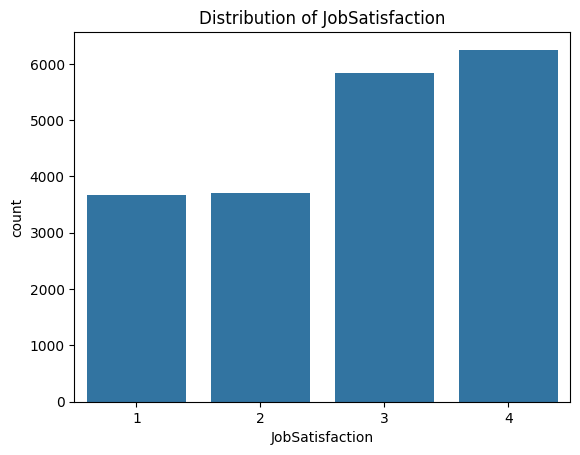

In [ ]:
sns.countplot(data=df, x='JobSatisfaction')
plt.title('Distribution of JobSatisfaction')
plt.show()

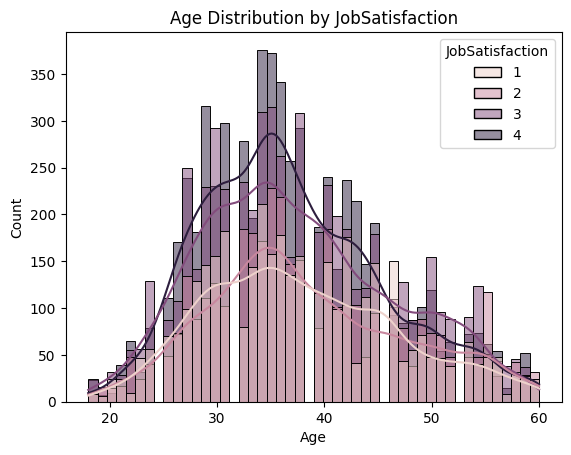

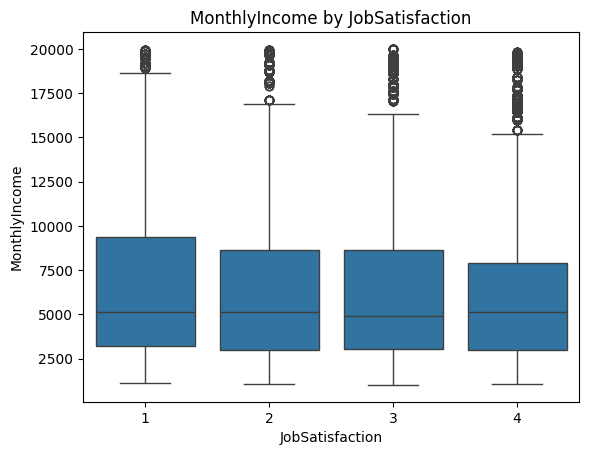

In [ ]:
sns.histplot(data=df, x='Age', hue='JobSatisfaction', kde=True)
plt.title('Age Distribution by JobSatisfaction')
plt.show()

sns.boxplot(data=df, x='JobSatisfaction', y='MonthlyIncome')
plt.title('MonthlyIncome by JobSatisfaction')
plt.show()

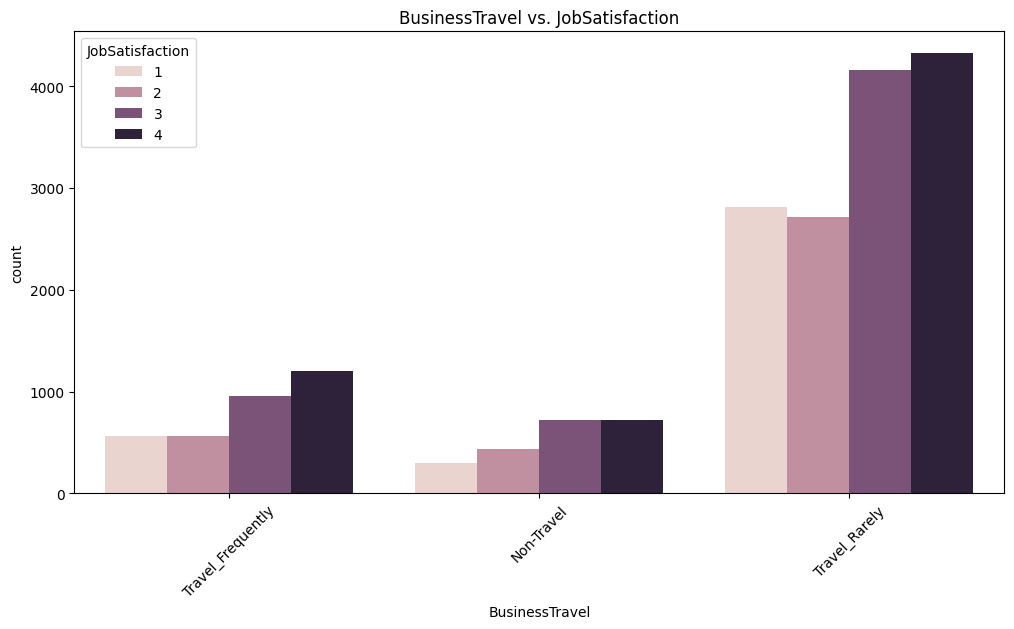

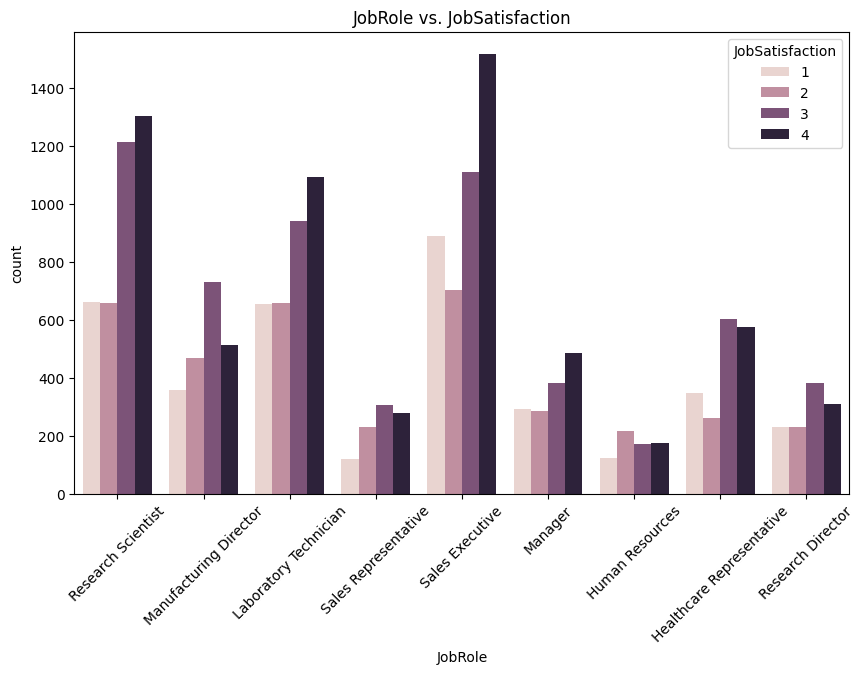

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BusinessTravel', hue='JobSatisfaction')
plt.title('BusinessTravel vs. JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobRole', hue='JobSatisfaction')
plt.title('JobRole vs. JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

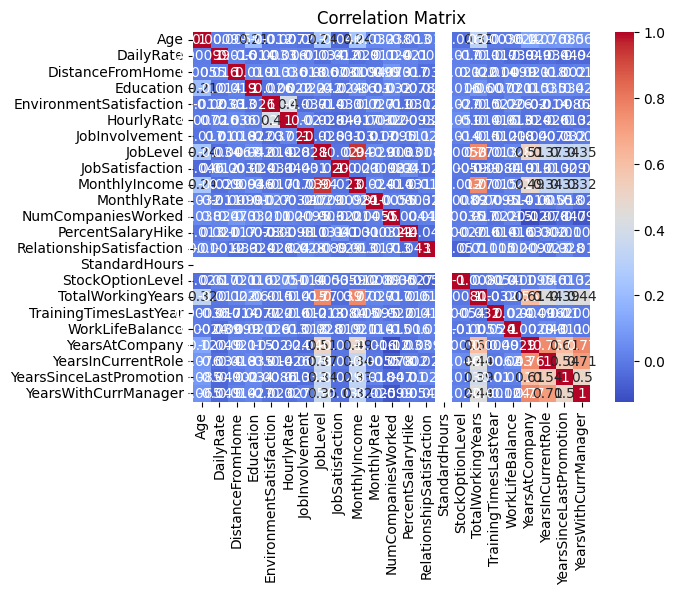

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

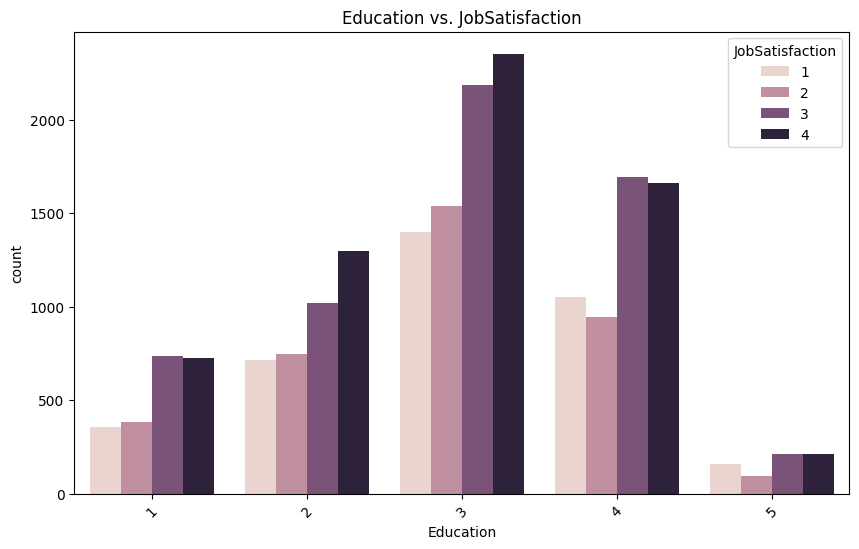

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='JobSatisfaction')
plt.title('Education vs. JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

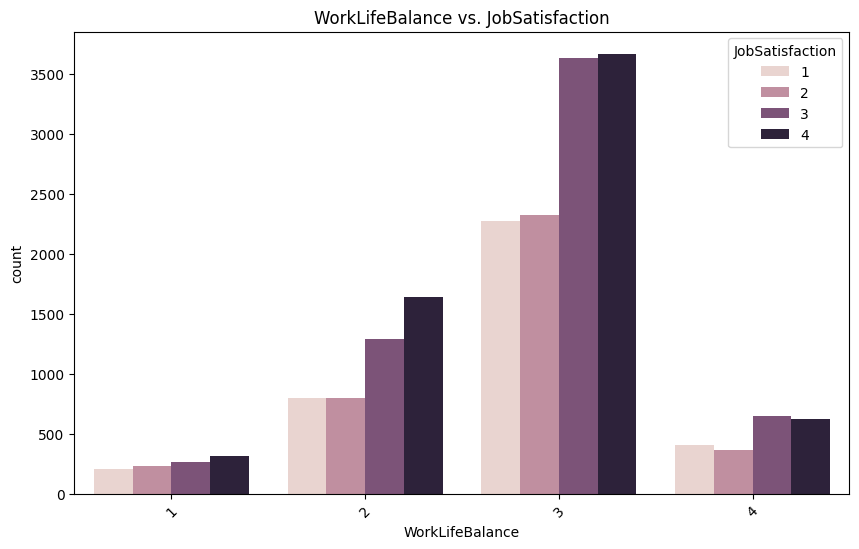

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WorkLifeBalance', hue='JobSatisfaction')
plt.title('WorkLifeBalance vs. JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

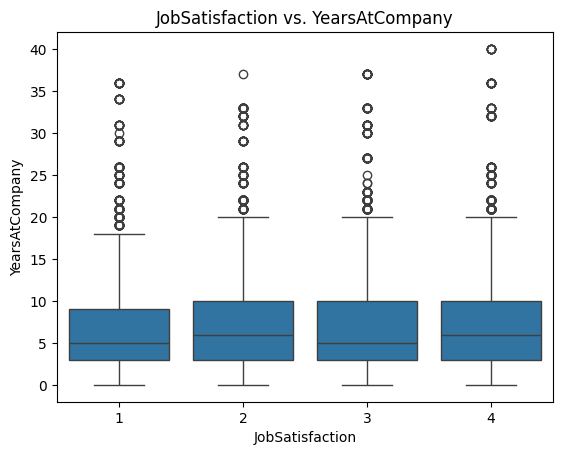

In [ ]:
sns.boxplot(data=df, x='JobSatisfaction', y='YearsAtCompany')
plt.title('JobSatisfaction vs. YearsAtCompany')
plt.show()

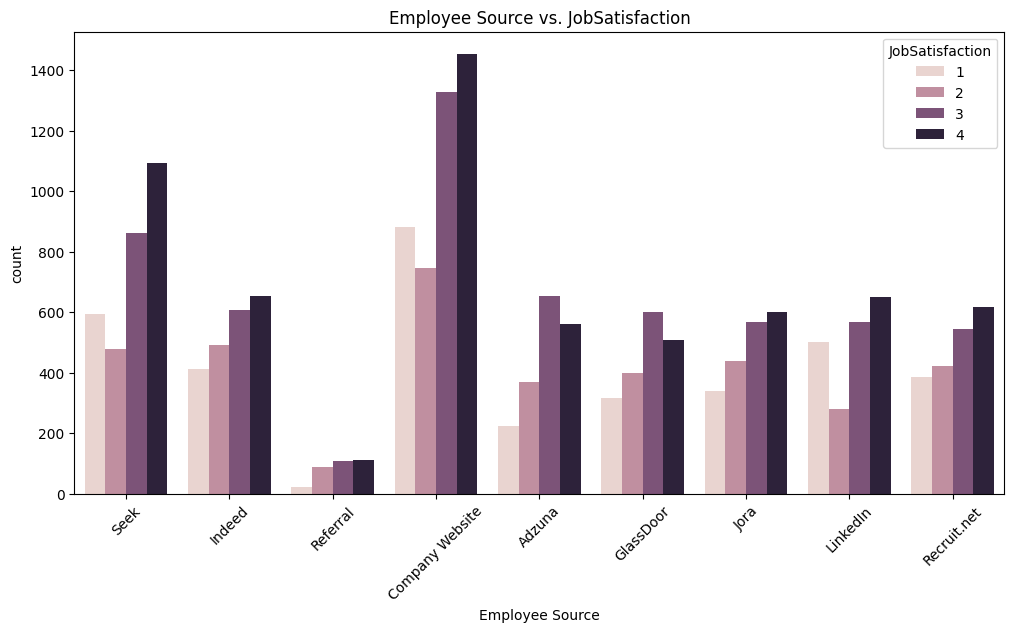

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Employee Source', hue='JobSatisfaction')
plt.title('Employee Source vs. JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

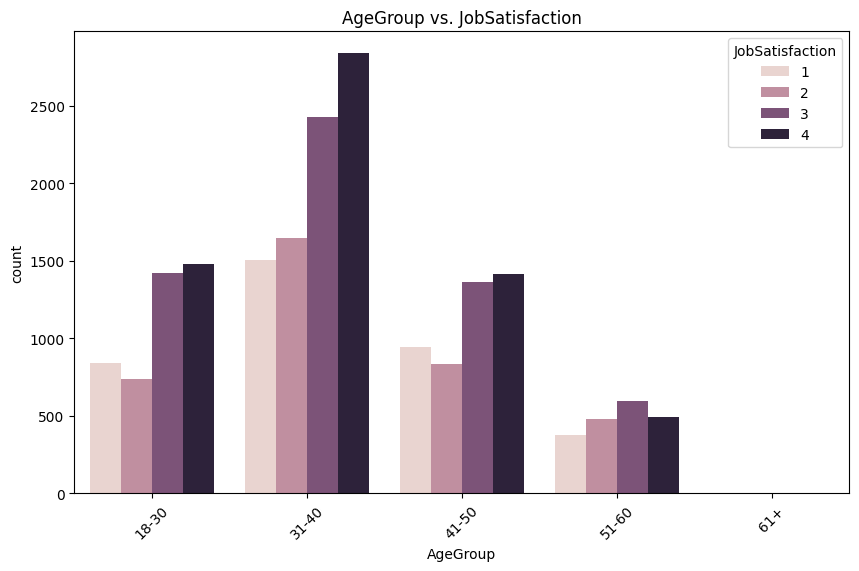

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, np.inf], labels=['18-30', '31-40', '41-50', '51-60', '61+'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='JobSatisfaction')
plt.title('AgeGroup vs. JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

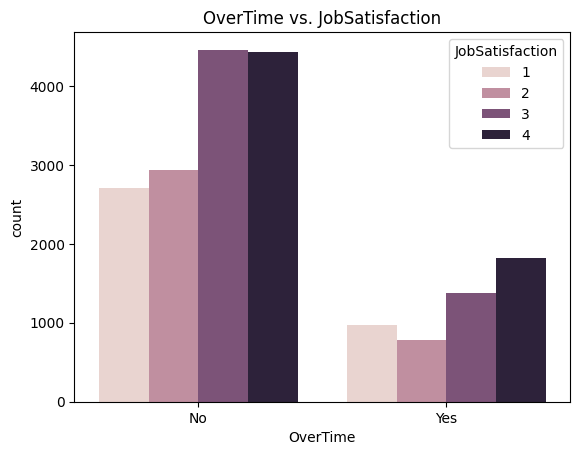

In [ ]:
sns.countplot(data=df, x='OverTime', hue='JobSatisfaction')
plt.title('OverTime vs. JobSatisfaction')
plt.show()

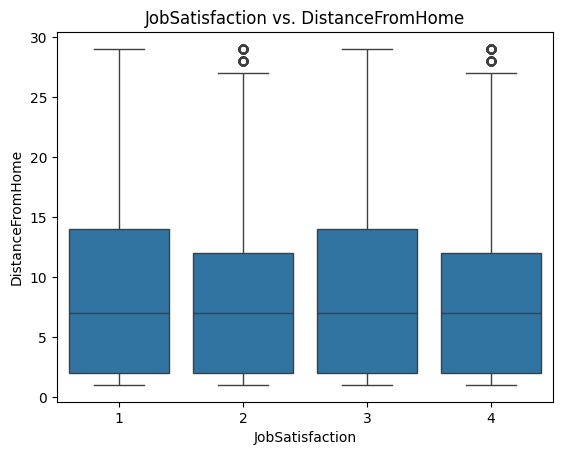

In [ ]:
sns.boxplot(data=df, x='JobSatisfaction', y='DistanceFromHome')
plt.title('JobSatisfaction vs. DistanceFromHome')
plt.show()

# Feature selection

<Axes: >

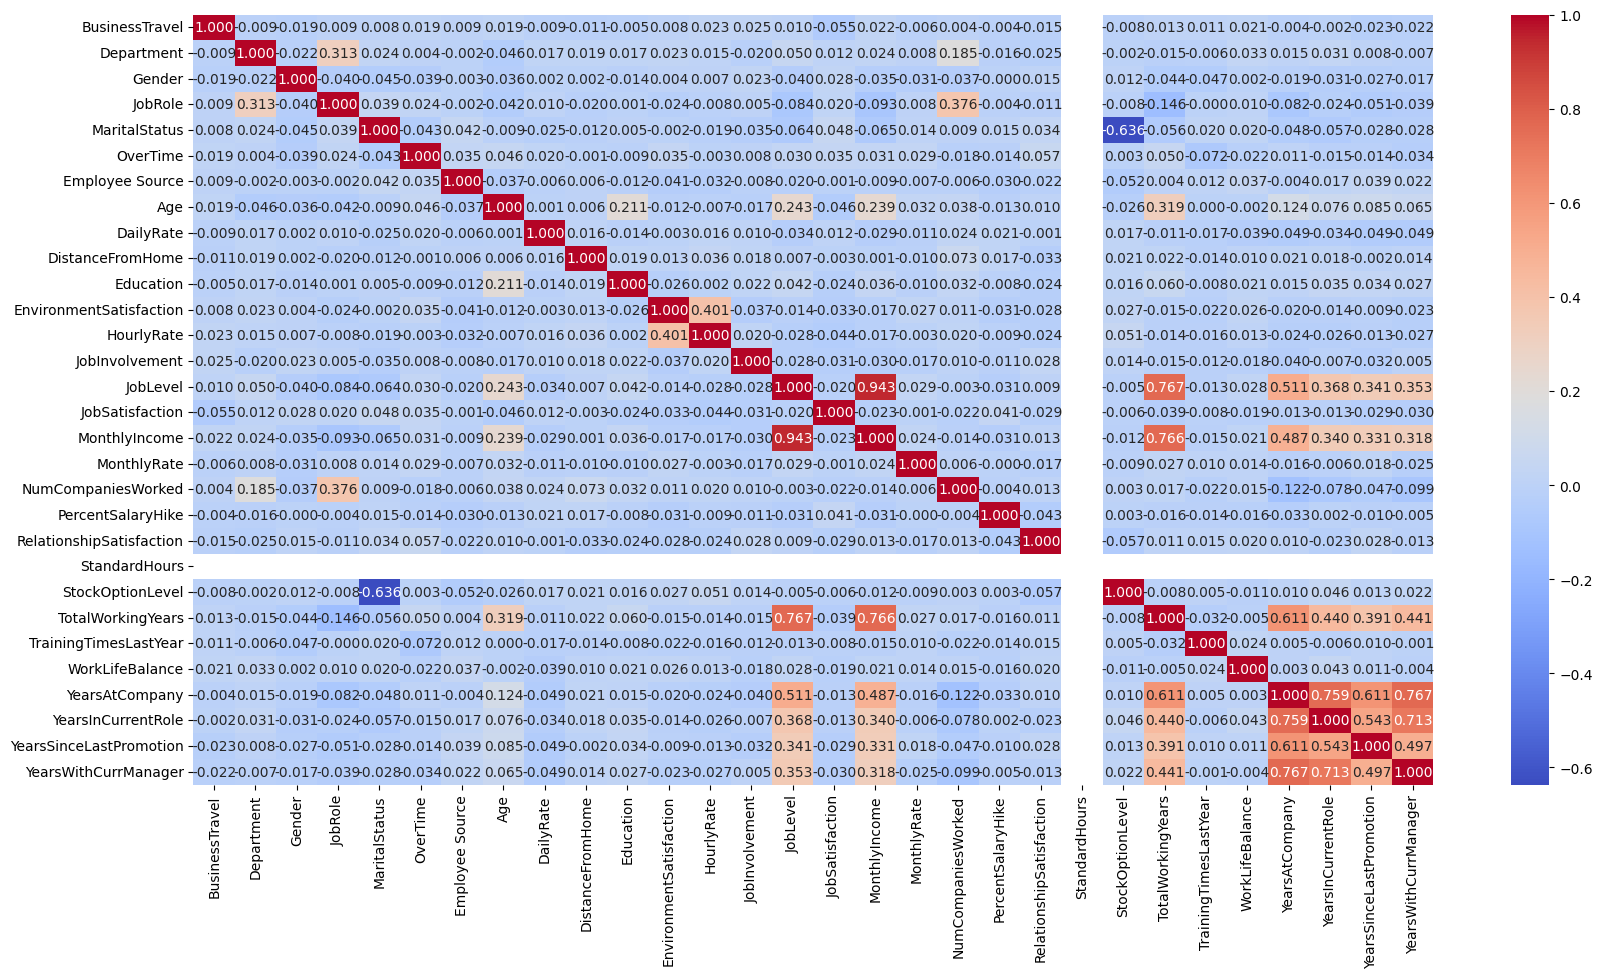

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm',fmt=".3f")

In [ ]:
corr=new_df.corr()['JobSatisfaction'].reset_index()
corr.sort_values('JobSatisfaction',ascending=False)

,index,JobSatisfaction
15,JobSatisfaction,1.000000
4,MaritalStatus,0.048312
19,PercentSalaryHike,0.040541
5,OverTime,0.034882
2,Gender,0.028142
3,JobRole,0.020238
1,Department,0.012380
8,DailyRate,0.011897
6,Employee Source,-0.000816
17,MonthlyRate,-0.000979


<Axes: xlabel='JobSatisfaction', ylabel='None'>

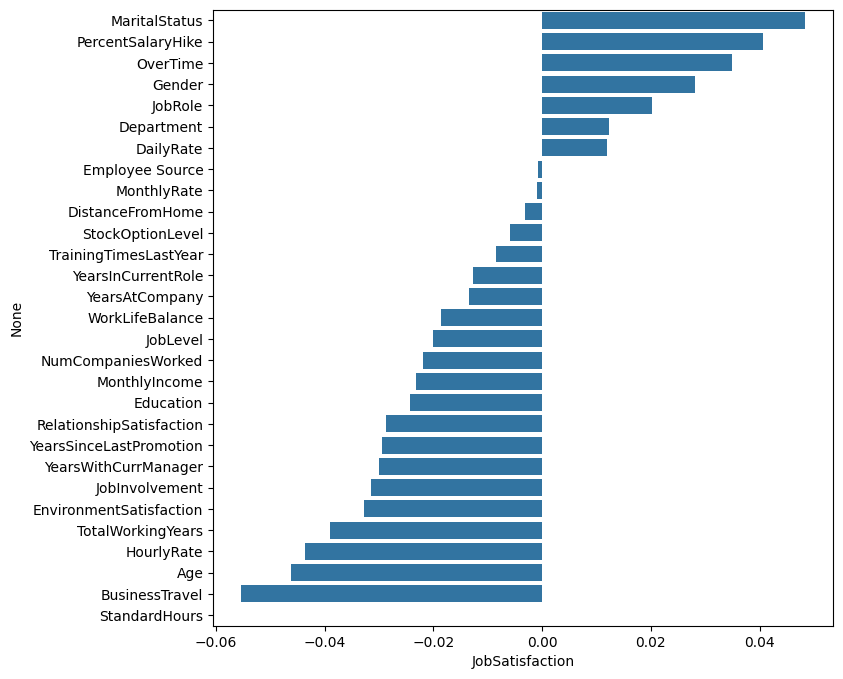

In [ ]:
corelation = pd.DataFrame(new_df.corr())
corelation = pd.DataFrame(corelation['JobSatisfaction'])
corelation=corelation.sort_values('JobSatisfaction',ascending=False)
indices_to_remove = ['JobSatisfaction']
corelation = corelation.drop(indices_to_remove)
plt.figure(figsize=(8,8))
sns.barplot(x=corelation['JobSatisfaction'],y=corelation.index)

In [ ]:
new_df.columns

Index(['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime', 'Employee Source', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
selected_columns = ['MaritalStatus', 'PercentSalaryHike', 'OverTime', 'Gender', 'JobRole', 'EnvironmentSatisfaction', 'TotalWorkingYears', 'HourlyRate', 'Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction']
sat= new_df[selected_columns]

In [ ]:
sat

,MaritalStatus,PercentSalaryHike,OverTime,Gender,JobRole,EnvironmentSatisfaction,TotalWorkingYears,HourlyRate,Age,BusinessTravel,MonthlyIncome,JobSatisfaction
0,1,23,0,1,6,3,10,61,49,1,5130,2
1,1,23,0,1,6,1,10,37,59,0,5130,2
2,1,23,0,1,6,1,10,37,59,0,5130,2
3,1,23,0,1,6,3,10,61,49,1,5130,2
4,1,23,0,1,6,3,10,61,49,1,5130,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19473,2,13,0,0,2,4,6,98,47,2,2837,2
19474,2,11,1,1,6,4,6,45,38,2,3944,4
19475,2,15,0,0,6,4,9,95,34,2,2311,2
19476,1,14,1,0,4,4,31,84,55,0,10008,1


# Feature Selection

In [ ]:
X=sat.drop('JobSatisfaction',axis=1)
X

,MaritalStatus,PercentSalaryHike,OverTime,Gender,JobRole,EnvironmentSatisfaction,TotalWorkingYears,HourlyRate,Age,BusinessTravel,MonthlyIncome
0,1,23,0,1,6,3,10,61,49,1,5130
1,1,23,0,1,6,1,10,37,59,0,5130
2,1,23,0,1,6,1,10,37,59,0,5130
3,1,23,0,1,6,3,10,61,49,1,5130
4,1,23,0,1,6,3,10,61,49,1,5130
...,...,...,...,...,...,...,...,...,...,...,...
19473,2,13,0,0,2,4,6,98,47,2,2837
19474,2,11,1,1,6,4,6,45,38,2,3944
19475,2,15,0,0,6,4,9,95,34,2,2311
19476,1,14,1,0,4,4,31,84,55,0,10008


In [ ]:
y=sat['JobSatisfaction']
y

0        2
1        2
2        2
3        2
4        2
        ..
19473    2
19474    4
19475    2
19476    1
19477    2
Name: JobSatisfaction, Length: 19478, dtype: int64

<Axes: ylabel='count'>

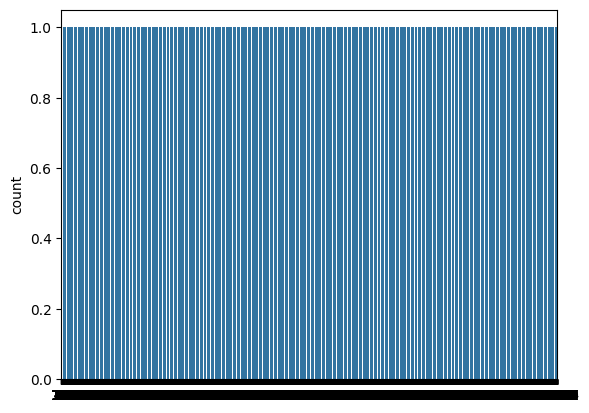

In [ ]:
sns.countplot(df['JobSatisfaction'])

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [ ]:
Xtrain.shape , Xtest.shape

((15582, 11), (3896, 11))

In [ ]:
ytrain.shape , ytest.shape

((15582,), (3896,))

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [ ]:
Xtrain=se.fit_transform(Xtrain)
Xtest=se.fit_transform(Xtest)

# Training models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
ad=AdaBoostClassifier()
svm=SVC(probability=True)
gau=GaussianNB()
bag=BaggingClassifier()
Gr=GradientBoostingClassifier()


In [ ]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(Xtrain, ytrain)
    ytrain_pred= model.predict(Xtrain)
    ytest_pred= model.predict(Xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", accuracy_score(ytrain,ytrain_pred))
    print("Test Data\n", accuracy_score(ytest,ytest_pred))

In [ ]:
model_building(knn)

KNeighborsClassifier(n_neighbors=3)
Train Data
 0.9896675651392632
Test Data
 0.981776180698152


In [ ]:
model_building(lr)

LogisticRegression()
Train Data
 0.34539853677319987
Test Data
 0.3408624229979466


In [ ]:
model_building(dt)

DecisionTreeClassifier()
Train Data
 1.0
Test Data
 0.8986139630390144


In [ ]:
model_building(ra)

RandomForestClassifier()
Train Data
 1.0
Test Data
 0.9961498973305954


In [ ]:
model_building(ad)

AdaBoostClassifier()
Train Data
 0.3762674881273264
Test Data
 0.36113963039014374


In [ ]:
model_building(svm)

SVC(probability=True)
Train Data
 0.6419586702605571
Test Data
 0.6054928131416838


In [ ]:
model_building(gau)

GaussianNB()
Train Data
 0.340007701193685
Test Data
 0.32931211498973306


In [ ]:
model_building(bag)

BaggingClassifier()
Train Data
 0.9998074701578745
Test Data
 0.9840862422997947


In [ ]:
model_building(Gr)

GradientBoostingClassifier()
Train Data
 0.6336798870491593
Test Data
 0.48716632443531827


In [ ]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier","svm","GaussianNB","Bagging Classifier", "Gradiant- Bossting Classifier"]

In [ ]:
new_df1 = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,})

In [ ]:
new_df1

,Algorithms,Training Score,Testing Score
0,k-Nearest Neighbors,0.989668,0.981776
1,Logistic Regression,0.345399,0.340862
2,Decision Tree Classifier,1.000000,0.898614
3,Random forest Classifier,1.000000,0.996150
4,Ada-Boosting Classifier,0.376267,0.361140
5,svm,0.641959,0.605493
6,GaussianNB,0.340008,0.329312
7,Bagging Classifier,0.999807,0.984086
8,Gradiant- Bossting Classifier,0.633680,0.487166


# Hypertunning

# Random forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
ra=RandomForestClassifier()

In [ ]:
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight' : ["balanced", "balanced_subsample"]

}

In [ ]:
ra_reg=RandomizedSearchCV(ra,param_distributions=random_forest_params,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
model_building(ra_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
 0.835515338210756
Test Data
 0.7517967145790554


# gaussianNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [ ]:
gau=GaussianNB()

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}


In [ ]:
gau_reg=GridSearchCV(gau,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')

In [ ]:
gau_reg.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [ ]:
model_building(gau_reg)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')
Train Data
 0.340007701193685
Test Data
 0.32931211498973306


# We select random forest as a best algorithm

In [ ]:
for i in sat:
    print(i)
    print(sat[i].unique())

MaritalStatus
[1 2 0]
PercentSalaryHike
[23 13 14 15 11 16 12 17 21 20 22 18 19 24 25]
OverTime
[0 1]
Gender
[1 0]
JobRole
[6 4 2 8 7 3 1 0 5]
EnvironmentSatisfaction
[3 1 2 4]
TotalWorkingYears
[10 16  6 19  7  8  5  2 38  3 20 17  1 12 22 21 13  9 14 11  4 30 23 28
 15 32 24 31 26 37  0 40 29 18 25 34 36 35 33 27]
HourlyRate
[ 61  37  95  87  56  79  62  40  33  57  42  81  67  90  44  66  53  31
  94  55  93  84  49  38  32  52  69  86  70  30  50  51  88  80  96  65
  78  45  46  41  82  99  58  39  48  63  72  83  97  75  73  98  36  47
  71  77  43  59  76  60  54 100  35  64  92  91  34  89  68  85  74]
Age
[49 59 54 33 30 27 31 58 25 32 44 28 36 41 34 38 39 40 45 47 35 37 29 42
 57 50 20 43 24 22 51 53 21 55 46 26 56 23 52 19 60 48 18]
BusinessTravel
[1 0 2]
MonthlyIncome
[5130 6499 4810 ... 9991 5390 4404]
JobSatisfaction
[2 3 1 4]


In [ ]:
data1 = {
    'MaritalStatus': [1],
    'PercentSalaryHike': [15],
    'OverTime': [1],
    'Gender': [0],
    'JobRole': [4],
    'EnvironmentSatisfaction': [3],
    'TotalWorkingYears': [10],
    'HourlyRate': [61],
    'Age': [49],
    'BusinessTravel': [1],
    'MonthlyIncome': [5130],

}


In [ ]:
new_data1 = pd.DataFrame(data1)

In [ ]:
new_data1

,MaritalStatus,PercentSalaryHike,OverTime,Gender,JobRole,EnvironmentSatisfaction,TotalWorkingYears,HourlyRate,Age,BusinessTravel,MonthlyIncome
0,1,15,1,0,4,3,10,61,49,1,5130


In [ ]:
scaled_new_data1= se.transform(new_data1)

In [ ]:
predictions = ra_reg.predict(scaled_new_data1)
predictions[0]

4

In [ ]:
sat[sat['JobSatisfaction']==4].head(1)

,MaritalStatus,PercentSalaryHike,OverTime,Gender,JobRole,EnvironmentSatisfaction,TotalWorkingYears,HourlyRate,Age,BusinessTravel,MonthlyIncome,JobSatisfaction
59,2,13,0,1,2,4,8,79,32,1,3068,4


In [ ]:
data2 = {
    'MaritalStatus': [2],
    'PercentSalaryHike': [13],
    'OverTime': [0],
    'Gender': [1],
    'JobRole': [2],
    'EnvironmentSatisfaction': [4],
    'TotalWorkingYears': [8],
    'HourlyRate': [79],
    'Age': [32],
    'BusinessTravel': [1],
    'MonthlyIncome': [3068]}

In [ ]:
new_data2 = pd.DataFrame(data2)
new_data2

,MaritalStatus,PercentSalaryHike,OverTime,Gender,JobRole,EnvironmentSatisfaction,TotalWorkingYears,HourlyRate,Age,BusinessTravel,MonthlyIncome
0,2,13,0,1,2,4,8,79,32,1,3068


In [ ]:
scaled_new_data2= se.transform(new_data2)

In [ ]:
predictions1 = ra_reg.predict(scaled_new_data2)
predictions1[0]

1

In [ ]:
import pickle

In [ ]:
pickle.dump(ra_reg,open('JobSatisfactionmodel.pkl','wb'))
pickle.dump(se,open('JobSatisfactionscaling.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)


1.4.1.post1
